In [19]:
# Importing Libraries

import pandas as pd
import nltk
import sklearn
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize, sent_tokenize
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


In [20]:
# Importing labelled Data

df = pd.read_csv("C:/Users/PC Klinik/Documents/Study Folder/Thesis_2/CSV File/Jira.csv")

In [21]:
print(df.shape)

(2569, 2)


In [22]:
df.describe(include='all')

,Comment,Sentiment
count,2569,2569
unique,2455,3
top,My bad.,Positive
freq,11,1105


c:\users\pc klinik\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


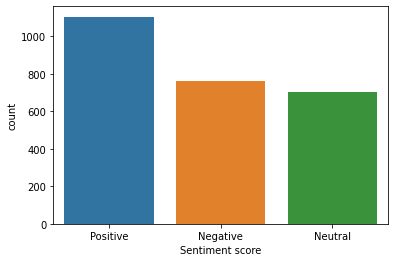

In [23]:
sns.countplot(df.Sentiment)
plt.xlabel('Sentiment score');

In [24]:
df['Sentiment'].value_counts()

Positive    1105
Negative     763
Neutral      701
Name: Sentiment, dtype: int64

In [25]:
def scrub_words(text):
    """Basic cleaning of texts."""
    
    # remove html markup
    text=re.sub("(<.*?>)","",text)
    
    #remove whitespace
    text=text.strip()
    return text

df['Cleaned_Comment']=[scrub_words(w) for w in df.Comment]

In [26]:
print(df.head(10))

                                             Comment Sentiment  \
0                             Committed. Thanks Ning  Positive   
1                      Sorry I meant ZOOKEEPER-1239.  Negative   
2  Hi  Ted  Matteo  Thanks for the review. The co...  Positive   
3  Thanks to both of you  and to Deepesh for the ...  Positive   
4              I just committed this. thanks steven!  Positive   
5  Thanks  Willem. Sorry  I was trying to get to ...  Positive   
6  Created an attachment (id=12544) mimeInput.eml...   Neutral   
7                                      Thanks Jimmy.  Positive   
8  This bug is fixed in 2.7  closing it down per ...   Neutral   
9                add keyword [PATCH] to description.   Neutral   

                                     Cleaned_Comment  
0                             Committed. Thanks Ning  
1                      Sorry I meant ZOOKEEPER-1239.  
2  Hi  Ted  Matteo  Thanks for the review. The co...  
3  Thanks to both of you  and to Deepesh for the ... 

In [27]:
# Removing stop words (Stop words are a set of commonly used words in any language)
#For example, in English, “the”, “is” and “and”, would easily qualify as stop words

nltk.download('stopwords')
stop_words = list(set(stopwords.words('english')))

[nltk_data] Downloading package stopwords to C:\Users\PC
[nltk_data]     Klinik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\PC
[nltk_data]     Klinik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\PC
[nltk_data]     Klinik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
X = df.Cleaned_Comment
y = df.Sentiment

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [30]:
# Defining lemmatizing function

def lemma_func(text):
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in Cleaned_Comment.split()]) for Cleaned_Comment in text]

In [31]:
# Corpus: 

corpus = X_train.values.tolist()

In [32]:
# Vectorization Function: 

vectorizer = TfidfVectorizer(input='content',
                              analyzer='word',
                              token_pattern='(?u)\\\\b\\\\w\\\\w+\\\\b',   #removing non-alphabets
                              tokenizer=lemma_func,    #lemmatisation of words
                              ngram_range=(1,2),   #unigrams and bigrams considered only
                              min_df=100,  #tokens occuring in <500 documents neglected
                              max_df = 0.95,  #tokens occuring in >95% documents neglected
                              max_features=50000,
                              stop_words=stop_words, #stopwords removed
                              lowercase=True  #converting all tokens to lowercase
                              )

In [33]:
data_train = vectorizer.fit_transform((corpus))

tar_lab = y_train

c:\users\pc klinik\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'", 'b', 'c', 'e', 'f', 'g', 'h', 'j', 'l', 'n', 'p', 'r', 'u', 'v', 'w'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   11.7s finished


Accuracy: 0.77431906614786
F1 score: 0.776199706528777
Recall: 0.77431906614786
Precision: 0.7815236052857648


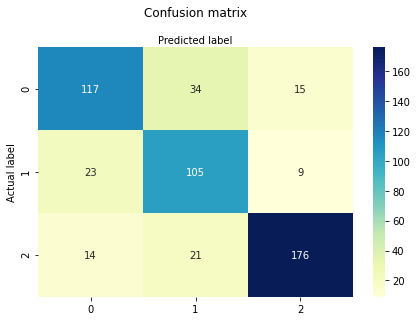

In [34]:
# Training the Logistic Regression Model

lr = LogisticRegressionCV(random_state=0, solver='liblinear', multi_class='ovr', cv=10, verbose=1)
lr_model = lr.fit(data_train, tar_lab)

test_corpus = X_test.values.tolist()
test = vectorizer.transform(test_corpus)

y_pred=lr_model.predict(test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print ('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print ('F1 score:', metrics.f1_score(y_test, y_pred,average='weighted'))
print ('Recall:', metrics.recall_score(y_test, y_pred,
                              average='weighted'))
print ('Precision:', metrics.precision_score(y_test, y_pred,
                                    average='weighted'))

Accuracy: 0.7898832684824902
F1 score: 0.7937948715388227
Recall: 0.7898832684824902
Precision: 0.8055272538697787


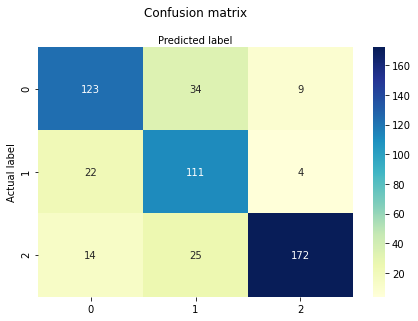

In [35]:
# training the svm model

svm_new = SVC()
svm_model = svm_new.fit(data_train, tar_lab)

test_corpus = X_test.values.tolist()
test = vectorizer.transform(test_corpus)

y_pred=svm_model.predict(test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print ('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print ('F1 score:', metrics.f1_score(y_test, y_pred,average='weighted'))
print ('Recall:', metrics.recall_score(y_test, y_pred,
                              average='weighted'))
print ('Precision:', metrics.precision_score(y_test, y_pred,
                                    average='weighted'))

Accuracy: 0.708171206225681
F1 score: 0.7062324558206582
Recall: 0.708171206225681
Precision: 0.708016762442142


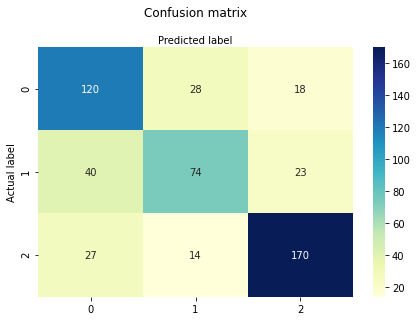

In [36]:
# training the Naive Bayes

nb = MultinomialNB()
nb_model = nb.fit(data_train, tar_lab)

test_corpus = X_test.values.tolist()
test = vectorizer.transform(test_corpus)

y_pred=nb_model.predict(test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print ('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print ('F1 score:', metrics.f1_score(y_test, y_pred,average='weighted'))
print ('Recall:', metrics.recall_score(y_test, y_pred,
                              average='weighted'))
print ('Precision:', metrics.precision_score(y_test, y_pred,
                                    average='weighted'))